# Objetivos deste trabalho:
- Se familiarizar com o ambiente Notebook e com Python
- Implementar um perceptron simples, treiná-lo no conjunto de TREINO do CIFAR-10 e avaliá-lo no conjunto de TESTE (alvo: distinguir fotos de animais de meios de transporte)
- Utilizar a função sigmóide e verificar seu efeito no treinamento e na avaliação
- Modificar a metodologia para classificar cada classe individualmente (i.e. treinar 10 perceptrons, um para cada classe). Considerar: dado um exemplo, que passará por cada perceptron, como decidir qual é a classe dele?

In [0]:
%matplotlib inline

import torch
import torchvision
import numpy as np
import seaborn as sn
import pandas as pd
from sklearn.metrics import confusion_matrix

np.seterr(all='raise')

{'divide': 'raise', 'invalid': 'raise', 'over': 'raise', 'under': 'raise'}

In [0]:
# Carregar os datasets

dataset_train = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True)

dataset_test = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [0]:
print(len(dataset_train), len(dataset_test))

50000 10000


In [0]:
# Converter para tons de cinza

# Treino
grayscale_dataset_train = []
for img,label in dataset_train:
    category = classes[label]
    gray_npimg = np.array(img.convert('L'))
    grayscale_dataset_train.append((gray_npimg,category))
    
# Teste
grayscale_dataset_test = []
for img,label in dataset_test:
    category = classes[label]
    gray_npimg = np.array(img.convert('L'))
    grayscale_dataset_test.append((gray_npimg,category))    

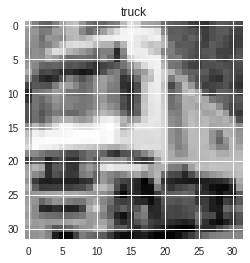

In [0]:
# Mostrar uma imagem

import matplotlib.pyplot as plt
import numpy as np

image_index = 1
label = grayscale_dataset_train[image_index][1]
npimg = grayscale_dataset_train[image_index][0]

plt.imshow(npimg, cmap='gray')
plt.title(label)
plt.show()

In [0]:
# Converter para vetores 1D

# Para pensar: por que a divisão por 255 no código abaixo?

linear_dataset_train = []
target_labels = ('plane', 'car', 'ship', 'truck')
for img,category in grayscale_dataset_train:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_train.append((linear_img,label))
    
linear_dataset_test = []
target_labels = ('plane', 'car', 'ship', 'truck')
for img,category in grayscale_dataset_test:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_test.append((linear_img,label))    

In [0]:
size = len(linear_dataset_train[0][0])
print(size)

1024


# Definindo o perceptron

In [0]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def perceptron(inputs, weights):
    # Defina o perceptron aqui
   
    #y=0
    o=np.dot(inputs, weights)
            
    y = sigmoid(o)
    return y


In [0]:
# Caso queiram plotar alguma coisa
y_test = linear_dataset_test[:2]

def printGraph(accuracies, losses_):
    import matplotlib.pyplot as plt
    plt.xlabel("Epoca")
    plt.ylabel("Acurácia")
    plt.title("Gráfico Acurácia")
    plt.plot(accuracies)
    plt.show()
    
    plt.xlabel("Epoca")
    plt.ylabel("Loss")
    plt.title("Gráfico Loss")
    plt.plot(losses_)
    plt.show()

# Treinando o perceptron

In [0]:
#avaliacao

evaluate_final = 0
classe_final = "none"

def evaluate(weights, dataset, classe="none"):
    
    
    np.random.shuffle(dataset)

    # Implemente o treino aqui (para separar as duas classes definidas)
    #colocar falso positivo etc
    accuracies_test = []
    losses_test  = []
    #y_pred = []
    sim = 0
    nao = 0
    losses = 0
    
    for img,category in dataset:
        img = np.append(img, 1)      
        ys = perceptron(img,weights)
        if ys >= 0.5 and category==1:
            sim+=1
            #yhat=1
        elif ys<0.5 and category==0:
            sim+=1
            #yhat=1
        elif ys<0.5 and category==1:
            nao+=1
            #yhat=0    
        elif ys >= 0.5 and category==0:
            nao+=1
            #yhat=0

        loss = (category - ys)**2 
        losses_test = np.append(losses_test, loss)
        loss=0
        #y_pred= np.append(y_pred, yhat)
     
           
    ac = sim/len(dataset)
    #accuracies_test = np.append(accuracies_test,ac)
    print("Acurácia Avaliação: ", ac) 
    #if classe!="none":
      #evaluate_class(classe, ac)
   
    #return y_pred
    
   

In [0]:
# Treinamento
# No treinamento foi setada uma constante de valor 10, que serve para "balancear" os acertos e conseguir uma acurácia que converge. No caso a variável extra é multiplicada nos pesos somente quando há um TP ou FP  
def training(dataset):
    weights = (np.random.rand(1,size) - 0.5)[0]
    bias = (np.random.rand(1) - 0.5) 
    weights = np.append(weights, bias) 

    neta = 0.001
    np.random.shuffle(dataset)

    # Implemente o treino aqui (para separar as duas classes definidas)
    
    accuracies = []
    sim = 0
    nao = 0
    losses = 0
    extra=1
    losses_train  = []
    for epoch in range(100):
        for img,category in dataset:
            img = np.append(img, 1)
            ys = perceptron(img,weights)
            extra=1
            if category == 1:
              extra=10
            
            if ys >= 0.5 and category==1:
                sim+=1
                 
            elif ys<0.5 and category==0:
                sim+=1
                

            delta = neta * img * (category - ys) * (ys*(1-ys)) * extra

            weights+=delta;

            loss = (category - ys)**2

            losses+=loss

            loss = 0

        ac = sim/len(dataset)
        accuracies = np.append(accuracies,ac)
        sim = 0
        print("Época: ", epoch, "Loss Treinamento: ", losses, "Acurácia Treinamento: ", ac)
        losses_train = np.append(losses_train, losses)
        losses=0

    printGraph(accuracies, losses_train)    
    return weights
    
    
  
    

In [0]:
# graphs_training

#new_weights = training(linear_dataset_train)



In [0]:
#y_pred = 
#evaluate(new_weights, linear_dataset_test)

#from sklearn.metrics import accuracy_score
#sklearn.metrics.accuracy_score(y_test, y_pred)
#sklearn.metrics.accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)[source]


# Classificando classes individuais

Implemente aqui a modificação do processo de avaliação e treinamento para poder classificar cada classe individualmente.

- Ideia geral: treinar um perceptron por classe (exemplo positivo = exemplos da classe; exemplos negativos = exemplo de todas outras classes)
- Dado um exemplo qualquer, como decidir qual perceptron está dando a classe correta?

In [0]:
# Gatohs

In [0]:
linear_dataset_train_cat = []
target_labels = ('cat')
for img,category in grayscale_dataset_train:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_train_cat.append((linear_img,label))
    
linear_dataset_test_cat = []
target_labels = ('cat')
for img,category in grayscale_dataset_test:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_test_cat.append((linear_img,label))    

Época:  0 Loss Treinamento:  16872.240228473245 Acurácia Treinamento:  0.50466
Época:  1 Loss Treinamento:  14164.00249139454 Acurácia Treinamento:  0.5448
Época:  2 Loss Treinamento:  13830.393526121627 Acurácia Treinamento:  0.54748
Época:  3 Loss Treinamento:  13626.648202165474 Acurácia Treinamento:  0.54824
Época:  4 Loss Treinamento:  13493.350371760574 Acurácia Treinamento:  0.54986
Época:  5 Loss Treinamento:  13399.939734582429 Acurácia Treinamento:  0.55122
Época:  6 Loss Treinamento:  13330.04094156715 Acurácia Treinamento:  0.55224
Época:  7 Loss Treinamento:  13274.940242668072 Acurácia Treinamento:  0.5531
Época:  8 Loss Treinamento:  13229.705920254506 Acurácia Treinamento:  0.55282
Época:  9 Loss Treinamento:  13191.36492122744 Acurácia Treinamento:  0.5537
Época:  10 Loss Treinamento:  13158.039381189643 Acurácia Treinamento:  0.55414
Época:  11 Loss Treinamento:  13128.501807047505 Acurácia Treinamento:  0.55494
Época:  12 Loss Treinamento:  13101.926742549045 Acuráci

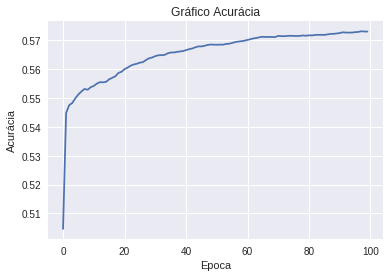

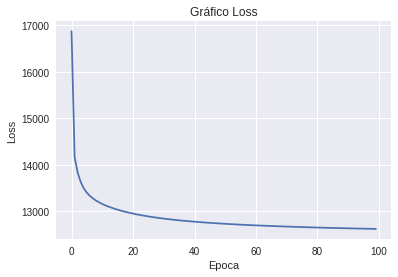

Acurácia Avaliação:  0.3174


In [0]:
#treinamento 

new_weights_cat = training(linear_dataset_train_cat)

#avaliacao

evaluate(new_weights_cat, linear_dataset_test_cat)

In [0]:
# Doggos :3

In [0]:
linear_dataset_train_dog = []
target_labels = ('dog')
for img,category in grayscale_dataset_train:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_train_dog.append((linear_img,label))
    
linear_dataset_test_dog = []
target_labels = ('dog')
for img,category in grayscale_dataset_test:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_test_dog.append((linear_img,label))    

Época:  0 Loss Treinamento:  14762.655517353005 Acurácia Treinamento:  0.563
Época:  1 Loss Treinamento:  13179.165655412427 Acurácia Treinamento:  0.58904
Época:  2 Loss Treinamento:  12856.825742754161 Acurácia Treinamento:  0.5939
Época:  3 Loss Treinamento:  12686.93979610983 Acurácia Treinamento:  0.596
Época:  4 Loss Treinamento:  12568.090782132447 Acurácia Treinamento:  0.59774
Época:  5 Loss Treinamento:  12477.515283584526 Acurácia Treinamento:  0.59942
Época:  6 Loss Treinamento:  12405.2632659544 Acurácia Treinamento:  0.59982
Época:  7 Loss Treinamento:  12345.977129113597 Acurácia Treinamento:  0.60116
Época:  8 Loss Treinamento:  12296.358796494027 Acurácia Treinamento:  0.60172
Época:  9 Loss Treinamento:  12254.192622493345 Acurácia Treinamento:  0.60224
Época:  10 Loss Treinamento:  12217.900396210727 Acurácia Treinamento:  0.60344
Época:  11 Loss Treinamento:  12186.313109932593 Acurácia Treinamento:  0.6041
Época:  12 Loss Treinamento:  12158.542395827528 Acurácia T

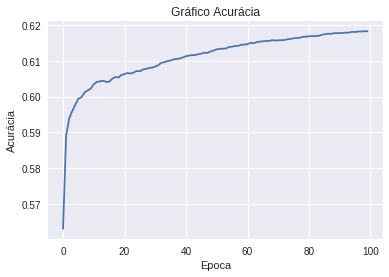

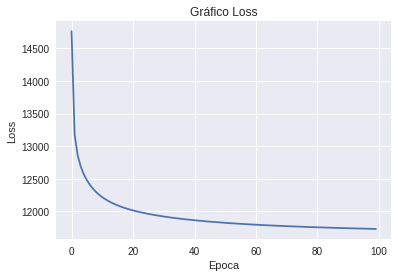

Acurácia Avaliação:  0.5985


In [0]:
#treinamento 

new_weights_dog = training(linear_dataset_train_dog)

#avaliacao

evaluate(new_weights_dog, linear_dataset_test_dog)

In [0]:
#ladybird

In [0]:
linear_dataset_train_bird = []
target_labels = ('bird')
for img,category in grayscale_dataset_train:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_train_bird.append((linear_img,label))
    
linear_dataset_test_bird = []
target_labels = ('bird')
for img,category in grayscale_dataset_test:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_test_bird.append((linear_img,label))    

Época:  0 Loss Treinamento:  16826.46132208567 Acurácia Treinamento:  0.48664
Época:  1 Loss Treinamento:  15068.189005139466 Acurácia Treinamento:  0.52892
Época:  2 Loss Treinamento:  14616.447315540729 Acurácia Treinamento:  0.53206
Época:  3 Loss Treinamento:  14327.755379167147 Acurácia Treinamento:  0.53296
Época:  4 Loss Treinamento:  14133.57690801387 Acurácia Treinamento:  0.53414
Época:  5 Loss Treinamento:  13995.28856626288 Acurácia Treinamento:  0.53446
Época:  6 Loss Treinamento:  13890.928777676114 Acurácia Treinamento:  0.5369
Época:  7 Loss Treinamento:  13808.250656359287 Acurácia Treinamento:  0.53748
Época:  8 Loss Treinamento:  13740.187490449242 Acurácia Treinamento:  0.53864
Época:  9 Loss Treinamento:  13682.494877116456 Acurácia Treinamento:  0.53988
Época:  10 Loss Treinamento:  13632.509049512852 Acurácia Treinamento:  0.54122
Época:  11 Loss Treinamento:  13588.473740170999 Acurácia Treinamento:  0.542
Época:  12 Loss Treinamento:  13549.17477297419 Acurácia

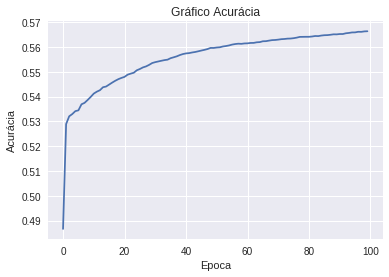

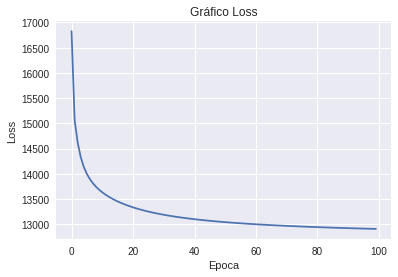

Acurácia Avaliação:  0.5047


In [0]:
#treinamento 

new_weights_bird = training(linear_dataset_train_bird)

#avaliacao

evaluate(new_weights_bird, linear_dataset_test_bird)

In [0]:
#horse

In [0]:
linear_dataset_train_horse = []
target_labels = ('horse')
for img,category in grayscale_dataset_train:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_train_horse.append((linear_img,label))
    
linear_dataset_test_horse = []
target_labels = ('horse')
for img,category in grayscale_dataset_test:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_test_horse.append((linear_img,label))    

Época:  0 Loss Treinamento:  13714.398216889871 Acurácia Treinamento:  0.5761
Época:  1 Loss Treinamento:  13000.61636141304 Acurácia Treinamento:  0.59316
Época:  2 Loss Treinamento:  12784.024528548922 Acurácia Treinamento:  0.59598
Época:  3 Loss Treinamento:  12650.202366141973 Acurácia Treinamento:  0.59664
Época:  4 Loss Treinamento:  12557.759594506166 Acurácia Treinamento:  0.59666
Época:  5 Loss Treinamento:  12489.836881404264 Acurácia Treinamento:  0.59794
Época:  6 Loss Treinamento:  12437.428434506915 Acurácia Treinamento:  0.59768
Época:  7 Loss Treinamento:  12395.434224942372 Acurácia Treinamento:  0.59706
Época:  8 Loss Treinamento:  12360.760067228135 Acurácia Treinamento:  0.59714
Época:  9 Loss Treinamento:  12331.398105672035 Acurácia Treinamento:  0.59754
Época:  10 Loss Treinamento:  12305.981399961098 Acurácia Treinamento:  0.5984
Época:  11 Loss Treinamento:  12283.552024022256 Acurácia Treinamento:  0.59834
Época:  12 Loss Treinamento:  12263.427378547294 Acur

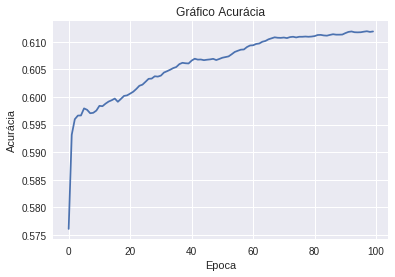

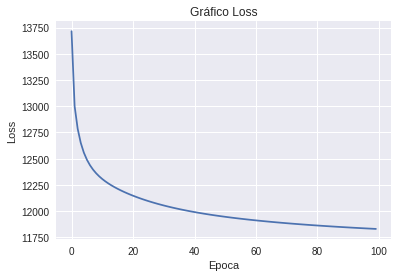

Acurácia Avaliação:  0.5951


In [0]:
#treinamento 

new_weights_horse = training(linear_dataset_train_horse)

#avaliacao

evaluate(new_weights_horse, linear_dataset_test_horse)

In [0]:
#deer

In [0]:
linear_dataset_train_deer = []
target_labels = ('deer')
for img,category in grayscale_dataset_train:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_train_deer.append((linear_img,label))
    
linear_dataset_test_deer = []
target_labels = ('deer')
for img,category in grayscale_dataset_test:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_test_deer.append((linear_img,label))    

Época:  0 Loss Treinamento:  15276.42220423568 Acurácia Treinamento:  0.52594
Época:  1 Loss Treinamento:  14200.546798776664 Acurácia Treinamento:  0.54906
Época:  2 Loss Treinamento:  13884.487531938663 Acurácia Treinamento:  0.55364
Época:  3 Loss Treinamento:  13690.565872701132 Acurácia Treinamento:  0.55484
Época:  4 Loss Treinamento:  13559.32744667177 Acurácia Treinamento:  0.55732
Época:  5 Loss Treinamento:  13464.712020277115 Acurácia Treinamento:  0.55788
Época:  6 Loss Treinamento:  13392.950139637562 Acurácia Treinamento:  0.55864
Época:  7 Loss Treinamento:  13336.226201338146 Acurácia Treinamento:  0.55938
Época:  8 Loss Treinamento:  13289.810774741223 Acurácia Treinamento:  0.55866
Época:  9 Loss Treinamento:  13250.705504640839 Acurácia Treinamento:  0.55932
Época:  10 Loss Treinamento:  13216.945824810928 Acurácia Treinamento:  0.5589
Época:  11 Loss Treinamento:  13187.211393459704 Acurácia Treinamento:  0.55926
Época:  12 Loss Treinamento:  13160.59531513418 Acurá

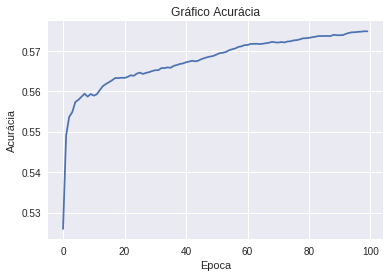

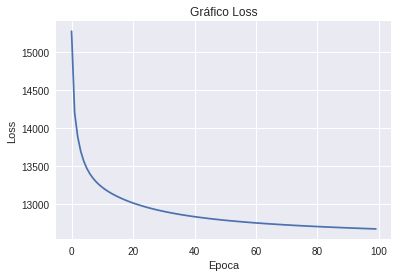

Acurácia Avaliação:  0.6293


In [0]:
#treinamento 

new_weights_deer = training(linear_dataset_train_deer)

#avaliacao

evaluate(new_weights_deer, linear_dataset_test_deer)

In [0]:
#airplane

In [0]:
linear_dataset_train_plane = []
target_labels = ('plane')
for img,category in grayscale_dataset_train:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_train_plane.append((linear_img,label))
    
linear_dataset_test_plane = []
target_labels = ('plane')
for img,category in grayscale_dataset_test:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_test_plane.append((linear_img,label))    

Época:  0 Loss Treinamento:  18835.239392246673 Acurácia Treinamento:  0.42722
Época:  1 Loss Treinamento:  15545.341053633325 Acurácia Treinamento:  0.49752
Época:  2 Loss Treinamento:  14704.249131416807 Acurácia Treinamento:  0.52066
Época:  3 Loss Treinamento:  14144.64667987466 Acurácia Treinamento:  0.53774
Época:  4 Loss Treinamento:  13723.598053908172 Acurácia Treinamento:  0.5512
Época:  5 Loss Treinamento:  13400.785597587967 Acurácia Treinamento:  0.56268
Época:  6 Loss Treinamento:  13151.401465635832 Acurácia Treinamento:  0.57196
Época:  7 Loss Treinamento:  12956.582685120187 Acurácia Treinamento:  0.57966
Época:  8 Loss Treinamento:  12802.153313843259 Acurácia Treinamento:  0.58548
Época:  9 Loss Treinamento:  12677.788136732866 Acurácia Treinamento:  0.58998
Época:  10 Loss Treinamento:  12576.075321861908 Acurácia Treinamento:  0.5934
Época:  11 Loss Treinamento:  12491.693879467668 Acurácia Treinamento:  0.59732
Época:  12 Loss Treinamento:  12420.789639368917 Acur

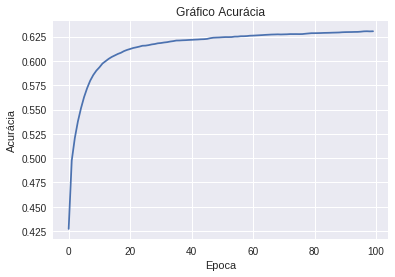

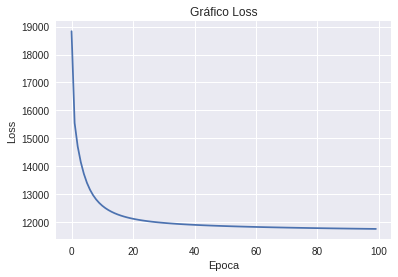

Acurácia Avaliação:  0.6195


In [0]:
#treinamento 

new_weights_plane = training(linear_dataset_train_plane)

#avaliacao

evaluate(new_weights_plane, linear_dataset_test_plane)

In [0]:
#car

In [0]:
linear_dataset_train_car = []
target_labels = ('car')
for img,category in grayscale_dataset_train:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_train_car.append((linear_img,label))
    
linear_dataset_test_car = []
target_labels = ('car')
for img,category in grayscale_dataset_test:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_test_car.append((linear_img,label))    

Época:  0 Loss Treinamento:  13891.311900982599 Acurácia Treinamento:  0.61304
Época:  1 Loss Treinamento:  11024.505383548942 Acurácia Treinamento:  0.68896
Época:  2 Loss Treinamento:  10737.144942418554 Acurácia Treinamento:  0.69584
Época:  3 Loss Treinamento:  10559.885647416668 Acurácia Treinamento:  0.70036
Época:  4 Loss Treinamento:  10421.492953356725 Acurácia Treinamento:  0.7034
Época:  5 Loss Treinamento:  10310.608910611822 Acurácia Treinamento:  0.70548
Época:  6 Loss Treinamento:  10221.364949246248 Acurácia Treinamento:  0.70672
Época:  7 Loss Treinamento:  10149.087969887169 Acurácia Treinamento:  0.70846
Época:  8 Loss Treinamento:  10090.096654081524 Acurácia Treinamento:  0.7096
Época:  9 Loss Treinamento:  10041.50460997635 Acurácia Treinamento:  0.71088
Época:  10 Loss Treinamento:  10001.047040355203 Acurácia Treinamento:  0.71132
Época:  11 Loss Treinamento:  9966.956925850955 Acurácia Treinamento:  0.71252
Época:  12 Loss Treinamento:  9937.867437725667 Acurác

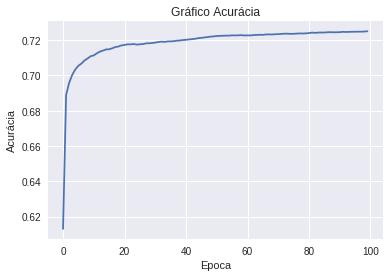

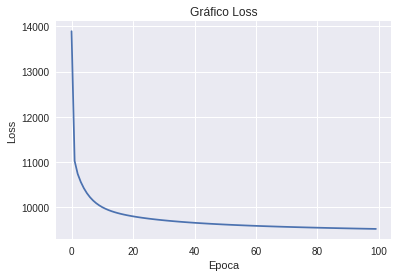

Acurácia Avaliação:  0.6339


In [0]:
#treinamento 

new_weights_car = training(linear_dataset_train_car)

#avaliacao

evaluate(new_weights_car, linear_dataset_test_car)

In [0]:
#ship ship

In [0]:
linear_dataset_train_ship = []
target_labels = ('ship')
for img,category in grayscale_dataset_train:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_train_ship.append((linear_img,label))
    
linear_dataset_test_ship = []
target_labels = ('ship')
for img,category in grayscale_dataset_test:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_test_ship.append((linear_img,label))    

Época:  0 Loss Treinamento:  13227.72306449066 Acurácia Treinamento:  0.61462
Época:  1 Loss Treinamento:  12480.380445043018 Acurácia Treinamento:  0.63364
Época:  2 Loss Treinamento:  12138.204503113164 Acurácia Treinamento:  0.63842
Época:  3 Loss Treinamento:  11896.945090656163 Acurácia Treinamento:  0.64358
Época:  4 Loss Treinamento:  11711.681724376776 Acurácia Treinamento:  0.64894
Época:  5 Loss Treinamento:  11563.369376771605 Acurácia Treinamento:  0.65328
Época:  6 Loss Treinamento:  11442.181917304295 Acurácia Treinamento:  0.6569
Época:  7 Loss Treinamento:  11341.970335747672 Acurácia Treinamento:  0.65966
Época:  8 Loss Treinamento:  11258.314376904622 Acurácia Treinamento:  0.66216
Época:  9 Loss Treinamento:  11187.830672284483 Acurácia Treinamento:  0.66516
Época:  10 Loss Treinamento:  11127.880850499558 Acurácia Treinamento:  0.66712
Época:  11 Loss Treinamento:  11076.40124131625 Acurácia Treinamento:  0.6687
Época:  12 Loss Treinamento:  11031.777766168565 Acurá

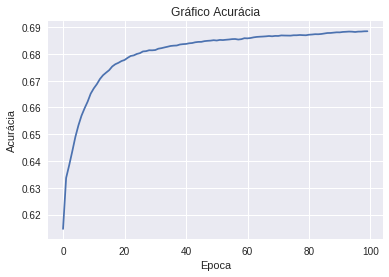

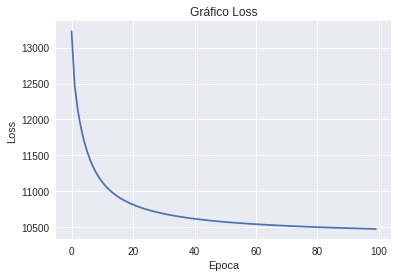

Acurácia Avaliação:  0.7735


In [0]:
#treinamento 

new_weights_ship = training(linear_dataset_train_ship)

#avaliacao

evaluate(new_weights_ship, linear_dataset_test_ship)

In [0]:
#frog

In [0]:
linear_dataset_train_frog = []
target_labels = ('frog')
for img,category in grayscale_dataset_train:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_train_frog.append((linear_img,label))
    
linear_dataset_test_frog = []
target_labels = ('frog')
for img,category in grayscale_dataset_test:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_test_frog.append((linear_img,label)) 

Época:  0 Loss Treinamento:  15023.054996969944 Acurácia Treinamento:  0.53346
Época:  1 Loss Treinamento:  14064.271257955406 Acurácia Treinamento:  0.55996
Época:  2 Loss Treinamento:  13800.60548871582 Acurácia Treinamento:  0.5655
Época:  3 Loss Treinamento:  13632.109460260179 Acurácia Treinamento:  0.5687
Época:  4 Loss Treinamento:  13504.106464776827 Acurácia Treinamento:  0.57162
Época:  5 Loss Treinamento:  13402.130213281065 Acurácia Treinamento:  0.57244
Época:  6 Loss Treinamento:  13319.324123759488 Acurácia Treinamento:  0.57372
Época:  7 Loss Treinamento:  13251.208076417379 Acurácia Treinamento:  0.57522
Época:  8 Loss Treinamento:  13194.458751836566 Acurácia Treinamento:  0.57614
Época:  9 Loss Treinamento:  13146.518926082403 Acurácia Treinamento:  0.57718
Época:  10 Loss Treinamento:  13105.420585025671 Acurácia Treinamento:  0.57778
Época:  11 Loss Treinamento:  13069.662860326842 Acurácia Treinamento:  0.57888
Época:  12 Loss Treinamento:  13038.110261043146 Acur

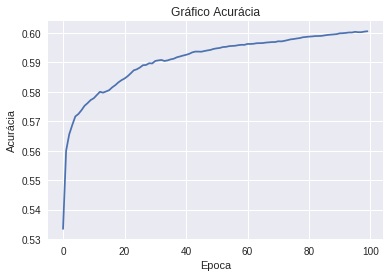

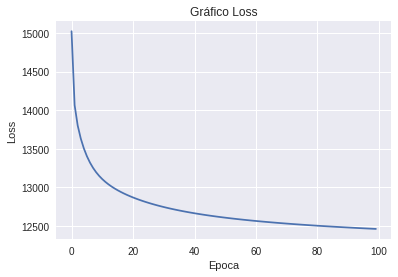

Acurácia Avaliação:  0.7293


In [0]:
#treinamento 

new_weights_frog = training(linear_dataset_train_frog)

#avaliacao

evaluate(new_weights_frog, linear_dataset_test_frog)

In [0]:
#truck

In [0]:
linear_dataset_train_truck = []
target_labels = ('truck')
for img,category in grayscale_dataset_train:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_train_truck.append((linear_img,label))
    
linear_dataset_test_truck = []
target_labels = ('truck')
for img,category in grayscale_dataset_test:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_test_truck.append((linear_img,label)) 

Época:  0 Loss Treinamento:  11787.28533169502 Acurácia Treinamento:  0.67464
Época:  1 Loss Treinamento:  10572.16155828114 Acurácia Treinamento:  0.71134
Época:  2 Loss Treinamento:  10240.817437766182 Acurácia Treinamento:  0.71832
Época:  3 Loss Treinamento:  10037.887060610874 Acurácia Treinamento:  0.72194
Época:  4 Loss Treinamento:  9894.694836825576 Acurácia Treinamento:  0.7248
Época:  5 Loss Treinamento:  9785.750885102898 Acurácia Treinamento:  0.727
Época:  6 Loss Treinamento:  9697.61482427444 Acurácia Treinamento:  0.7278
Época:  7 Loss Treinamento:  9623.253469472484 Acurácia Treinamento:  0.72986
Época:  8 Loss Treinamento:  9558.993363106256 Acurácia Treinamento:  0.73218
Época:  9 Loss Treinamento:  9502.743520069596 Acurácia Treinamento:  0.73392
Época:  10 Loss Treinamento:  9453.138661308327 Acurácia Treinamento:  0.73478
Época:  11 Loss Treinamento:  9409.171017503233 Acurácia Treinamento:  0.73602
Época:  12 Loss Treinamento:  9370.036001352562 Acurácia Treiname

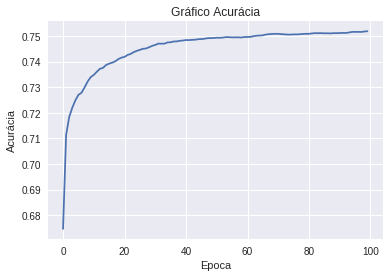

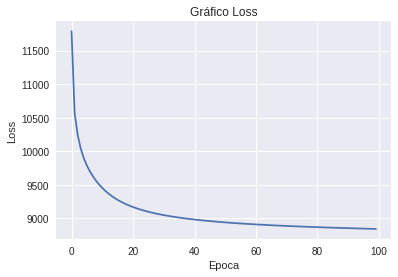

Acurácia Avaliação:  0.7411


In [0]:
#treinamento 

new_weights_truck = training(linear_dataset_train_truck)

#avaliacao

evaluate(new_weights_truck, linear_dataset_test_truck)

In [0]:
#avaliação final

In [0]:
linear_dataset_test_final = []


w, h = 2, 10;
weights_final = [[0 for x in range(w)] for y in range(h)]
weights_final[0] = [new_weights_cat, 1]
weights_final[1] = [new_weights_dog, 2]
weights_final[2] = [new_weights_bird, 3]
weights_final[3] = [new_weights_deer, 4]
weights_final[4] = [new_weights_horse, 5]
weights_final[5] = [new_weights_car, 6]
weights_final[6] = [new_weights_plane, 7]
weights_final[7] = [new_weights_ship, 8]
weights_final[8] = [new_weights_frog, 9]
weights_final[9] = [new_weights_truck, 10]

#print(weights_final)

for img,category in grayscale_dataset_test:
    #print(category)
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category =='cat':
      label = 1
    elif category == 'dog':
      label = 2
    elif category == 'bird':
      label = 3
    elif category == 'deer':
      label = 4
    elif category == 'horse':
      label = 5
    elif category == 'car':
      label = 6
    elif category == 'plane':
      label = 7
    elif category == 'ship':
      label = 8
    elif category == 'frog':
      label = 9
    elif category == 'truck':
      label = 10
    linear_dataset_test_final.append((linear_img,label)) 
    #print(label)


maximo = 0
pred = 0
acertos = 0
y_label = []
y_pred = []

for img,category in linear_dataset_test_final:
  img = np.append(img, 1) 
  y_label = np.append(y_label, category)
  for i in range(10):
    p = perceptron(img, weights_final[i][0])
    
    if(p>maximo):
      pred = weights_final[i][1];
      maximo = p
      
  y_pred = np.append(y_pred, pred)  
  if pred == category:
    acertos+=1
    
  maximo = 0
    
    
  #print(perceptron(img, new_weights_cat))
  
  
  #print(category)
 
  
ac_final = acertos/len(linear_dataset_test_final)
print(ac_final)

cm = confusion_matrix(y_label, y_pred)


0.2509


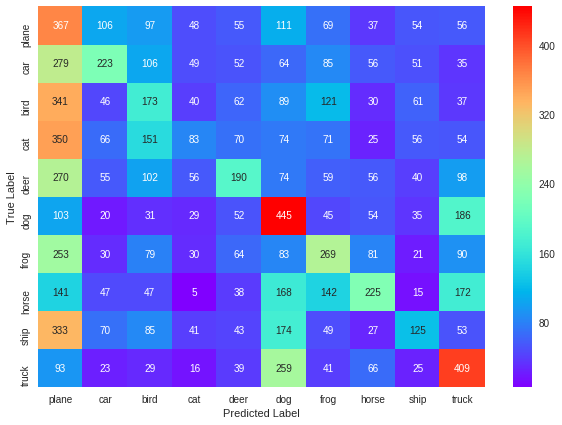

In [0]:
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
plt.figure(figsize=(10,7))
sn.heatmap(df_cm, annot=True, cmap=plt.cm.rainbow, fmt='d')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()